In [92]:
import pandas as pd
import numpy as np
import sys
import os

In [93]:
file_path = "/home/yixin/work/msxf/CQU_TimeSeries_Algo/MultiPatch_super/dataset/"
# file_name = "train_dev_8.csv"
file_name = "train_dev1.csv"

df = pd.read_csv(file_path+file_name)
df.head()

,pool_id,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
0,1,1701784800,7.35,89.23,669391777792,1986046564774
1,1,1701788400,7.28,89.23,675155816448,1986046564774
2,1,1701792000,7.25,89.23,664276680704,1986046564774
3,1,1701795600,7.18,89.23,665704325120,1986046564774
4,1,1701799200,7.17,89.23,665549680640,1986046564774


In [94]:
df['pool_id'].value_counts()

pool_id
8     5510
17    5509
1     5508
16    5506
4     5504
13    5504
12    5503
9     5500
14    5498
18    4724
20    4568
21    4567
19    4567
23    4188
24    4110
26    3482
29    3162
3     2166
31    1355
33    1258
35     465
32      81
25       4
Name: count, dtype: int64

In [95]:
nunique_res = df.groupby(by='pool_id').agg(lambda x: x.nunique())
nunique_res

,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
pool_id,,,,,
1,5508,1432,1430,5416,2081
3,2166,1,1,1,1
4,5504,215,77,5438,68
8,5510,917,980,5167,1060
9,5500,992,190,5046,191
12,5503,711,314,5384,331
13,5504,265,81,5232,89
14,5498,2660,35,5473,39
16,5506,229,242,5286,253


In [96]:
ncount_res = df.groupby(by='pool_id').count()
ncount_res

,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
pool_id,,,,,
1,5508,5508,5508,5508,5508
3,2166,2166,2166,2166,2166
4,5504,5504,5504,5504,5504
8,5510,5510,5510,5510,5510
9,5500,5500,5500,5500,5500
12,5503,5503,5503,5503,5503
13,5504,5504,5504,5504,5504
14,5498,5498,5498,5498,5498
16,5506,5506,5506,5506,5506


In [103]:
zero_count = df.groupby(by='pool_id').agg(lambda x: sum(x==0))
zero_count

,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
pool_id,,,,,
1,0,4,1,4,1
3,0,2166,2166,2166,2166
4,0,4,1,4,1
8,0,344,340,338,339
9,0,349,343,344,339
12,0,1,1,1,1
13,0,0,0,0,0
14,0,0,0,0,0
16,0,0,0,0,0


In [97]:

pool_ids_nunique = (nunique_res.loc[nunique_res["cpu_usage"]>=200,:].reset_index())['pool_id'].tolist()
pool_ids_ncount = (ncount_res.loc[ncount_res['cpu_usage']>=2000, :].reset_index())['pool_id'].tolist()
pool_ids_non_zeros = (nunique_res.loc[nunique_res["cpu_usage"]>=200,:].reset_index())['pool_id'].tolist()
valid_pool_id = set(pool_ids_ncount).intersection(set(pool_ids_nunique))
valid_pool_id

{1, 4, 8, 9, 12, 13, 14, 16, 20, 23, 24, 26}

In [98]:
out_df = df[df['pool_id'].isin(valid_pool_id)]#to_csv("/home/yixin/work/msxf/CQU_TimeSeries_Algo/MultiPatch_super/dataset/filtered_dev.csv", index=False)

In [99]:
out_df.head()

,pool_id,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
0,1,1701784800,7.35,89.23,669391777792,1986046564774
1,1,1701788400,7.28,89.23,675155816448,1986046564774
2,1,1701792000,7.25,89.23,664276680704,1986046564774
3,1,1701795600,7.18,89.23,665704325120,1986046564774
4,1,1701799200,7.17,89.23,665549680640,1986046564774


In [100]:
out_df = out_df.sort_values(by=['pool_id',"timestamp"])
out_df

,pool_id,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
0,1,1701784800,7.35,89.23,669391777792,1986046564774
1,1,1701788400,7.28,89.23,675155816448,1986046564774
2,1,1701792000,7.25,89.23,664276680704,1986046564774
3,1,1701795600,7.18,89.23,665704325120,1986046564774
4,1,1701799200,7.17,89.23,665549680640,1986046564774
...,...,...,...,...,...,...
81913,26,1720044069,3.88,201.56,10880610418688,13868449398784
81914,26,1720047601,2.71,201.56,10880317542400,13868449398784
81915,26,1720051201,2.72,201.56,10880524951552,13868449398784
81916,26,1720054801,2.81,201.56,10880523431936,13868449398784


In [101]:
out_df.to_csv("/home/yixin/work/msxf/CQU_TimeSeries_Algo/MultiPatch_super/dataset/filtered_dev.csv", index=False)

In [11]:
out_df['pool_id'].value_counts()

pool_id
8     5510
1     5508
16    5506
4     5504
13    5504
12    5503
9     5500
14    5498
20    4568
23    4188
24    4110
26    3482
Name: count, dtype: int64

In [12]:
test_pool_id = [1, 26, 14]
df_train = out_df[~out_df['pool_id'].isin(test_pool_id)]
df_test = out_df[out_df['pool_id'].isin(test_pool_id)]

In [14]:
df_train.shape

(45893, 6)

In [15]:
len(df_train) - 336 - 192 + 1

45366

In [19]:
df_train['pool_id'].nunique()

9

In [20]:
df_train_group = df_train.groupby(by='pool_id')

In [27]:
pool_idx = np.random.randint(45366) % df_train['pool_id'].nunique()
pool_ids = df_train['pool_id'].unique()
pool_id = pool_ids[pool_idx]
pool_data = df_train_group.get_group(pool_id)
pool_data

,pool_id,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
29691,13,1701784803,2.37,13.35,20553089024,77980499968
29692,13,1701788404,2.38,13.35,20602822656,77980499968
29693,13,1701792004,2.37,13.35,20589871104,77980499968
29694,13,1701795603,2.37,13.35,20578209792,77980499968
29695,13,1701799203,2.34,13.35,20575948800,77980499968
...,...,...,...,...,...,...
35190,13,1720044068,0.94,23.31,821444534272,1343879160800
35191,13,1720047600,1.02,23.31,823602208768,1343879160800
35192,13,1720051200,1.09,23.31,827411722240,1343879160800
35193,13,1720054800,1.06,23.31,831078105088,1343879160800


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df_train.columns
value_columns = columns[2:]
scaler.fit(df_train.loc[:, value_columns])

StandardScaler()

In [47]:
transformed = scaler.transform(df_train.loc[:, value_columns])

In [48]:
transformed

array([[-0.18614107, -0.57641647, -0.40475374, -0.40244664],
       [-0.18138323, -0.57641647, -0.40451328, -0.40244664],
       [-0.1908989 , -0.57641647, -0.40513141, -0.40244664],
       ...,
       [-0.19327782, -0.47571785, -0.40612467, -0.40864949],
       [-0.2027935 , -0.47571785, -0.40607582, -0.40864949],
       [-0.14807836, -0.47571785, -0.40597349, -0.40864949]])

In [49]:
df_train.loc[:, value_columns] = transformed

/tmp/ipykernel_95026/3369697271.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40475374 -0.40451328 -0.40513141 ... -0.40612467 -0.40607582
 -0.40597349]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, value_columns] = transformed
/tmp/ipykernel_95026/3369697271.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40244664 -0.40244664 -0.40244664 ... -0.40864949 -0.40864949
 -0.40864949]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.loc[:, value_columns] = transformed


In [61]:
df_train.reset_index(inplace=True, drop=True)

In [62]:
df_train

,pool_id,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
0,4,1701784801,-0.186141,-0.576416,-0.404754,-0.402447
1,4,1701788401,-0.181383,-0.576416,-0.404513,-0.402447
2,4,1701792001,-0.190899,-0.576416,-0.405131,-0.402447
3,4,1701795601,-0.190899,-0.576416,-0.404948,-0.402447
4,4,1701799201,-0.186141,-0.576416,-0.405057,-0.402447
...,...,...,...,...,...,...
45888,24,1720044069,-0.202793,-0.475718,-0.406102,-0.408649
45889,24,1720047601,-0.205172,-0.475718,-0.406120,-0.408649
45890,24,1720051201,-0.193278,-0.475718,-0.406125,-0.408649
45891,24,1720054801,-0.202793,-0.475718,-0.406076,-0.408649


In [76]:
idx = 5500
length = 300
chosen = df_train.loc[idx:idx+length,:]
chosen

,pool_id,timestamp,cpu_usage,cpu_allocated,mem_use,mem_allocated
5500,4,1720047600,-0.412138,-0.660996,-0.381617,-0.397963
5501,4,1720051200,-0.476369,-0.660996,-0.381637,-0.397963
5502,4,1720054800,-0.452580,-0.660996,-0.381625,-0.397963
5503,4,1720054897,-0.471611,-0.660996,-0.381606,-0.397963
5504,8,1701784802,1.481481,1.465522,1.540679,1.702213
...,...,...,...,...,...,...
5796,8,1702774802,1.952507,1.779174,1.747651,1.895739
5797,8,1702778402,1.728889,1.779174,1.747809,1.895739
5798,8,1702782002,1.707478,1.779174,1.747959,1.895739
5799,8,1702785602,1.726510,1.779174,1.748334,1.895739


In [88]:
other_id = chosen['pool_id'].unique().tolist()
other_id[other_id!=4]

8

In [89]:
from collections import Counter

In [91]:
Counter([1,1,2,3])[1]

2

In [2]:
import re
import numpy as np

result = """

336_192_NLinear_filtered_dev_ftM_sl336_ll48_pl192_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0  
mse:0.16121548414230347, mae:0.14239628612995148, rse:0.34291836619377136

336_192_NLinear_filtered_dev_ftM_sl336_ll48_pl192_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_Exp_1  
mse:0.05087858438491821, mae:0.08978990465402603, rse:0.22117815911769867

336_192_NLinear_filtered_dev_ftM_sl336_ll48_pl192_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_Exp_2  
mse:0.033749498426914215, mae:0.08796820044517517, rse:0.15980984270572662

336_192_NLinear_filtered_dev_ftM_sl336_ll48_pl192_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_Exp_3  
mse:0.09706185013055801, mae:0.0971233993768692, rse:0.259239137172699

336_192_NLinear_filtered_dev_ftM_sl336_ll48_pl192_dm16_nh4_el3_dl1_df128_fc1_ebtimeF_dtTrue_Exp_4  
mse:0.142822727560997, mae:0.12246579676866531, rse:0.3166291117668152

"""

mse = re.findall(".*mse:(.*?),", result)
mae = re.findall(".*mae:(.*?),", result)
rse = re.findall(".*rse:(.*?)\n", result)

mse = [float(x) for x in mse]
mae = [float(x) for x in mae]
rse = [float(x) for x in rse]
print(f"avg.mse: {np.round(np.mean(mse),3)}")
print(f"avg.mae: {np.round(np.mean(mae),3)}")
print(f"avg.rse: {np.round(np.mean(rse),3)}")


avg.mse: 0.097
avg.mae: 0.108
avg.rse: 0.26


ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (20).

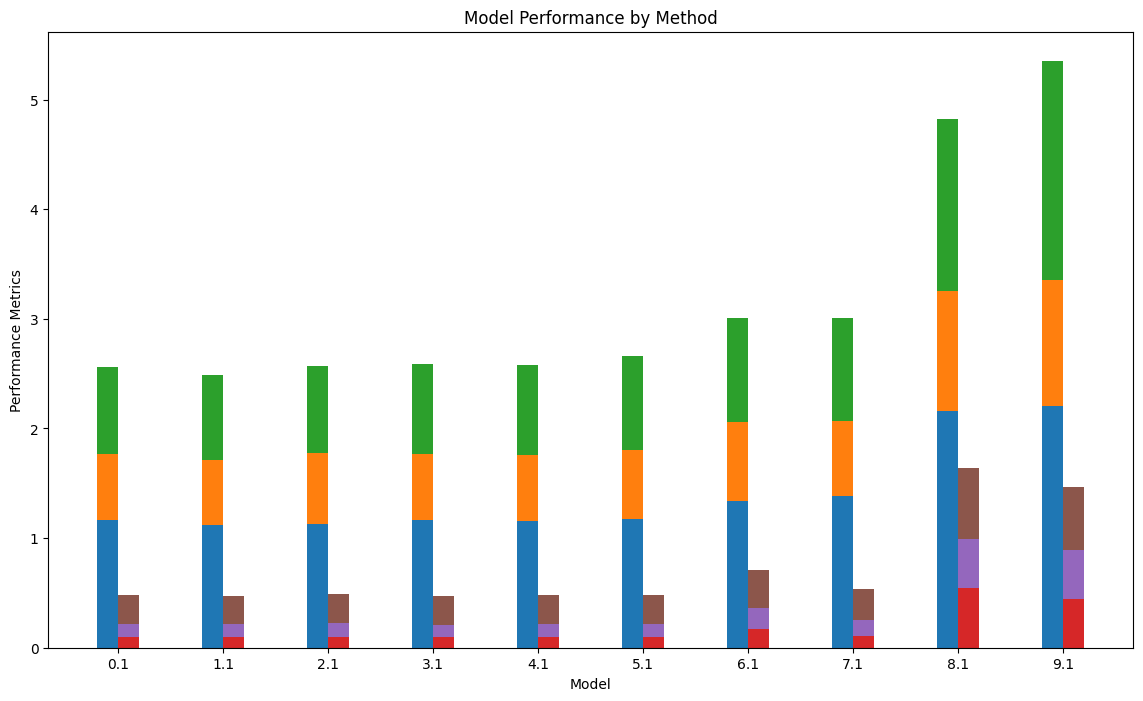

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'data' is a pandas DataFrame containing your model performance data
data = {
    'Model': ['NLinear', 'Multi-Patch', 'DLinear', 'Patch-TST', 'TimesMixer', 'iTransformer', 'Autoformer', 'Mamba', 'Informer', 'LSTM']*2,
    'MSE_Avg': [1.169, 1.117, 1.129, 1.162, 1.154, 1.178, 1.336, 1.38, 2.156, 2.202, 0.101, 0.101, 0.101, 0.097, 0.102, 0.102, 0.175, 0.111, 0.549, 0.441],
    'MAE_Avg': [0.596, 0.592, 0.644, 0.608, 0.602, 0.627, 0.726, 0.688, 1.102, 1.154, 0.112, 0.111, 0.12, 0.114, 0.111, 0.114, 0.184, 0.138, 0.446, 0.449],
    'RSE_Avg': [0.792, 0.781, 0.795, 0.82, 0.82, 0.854, 0.944, 0.943, 1.565, 1.996, 0.265, 0.256, 0.266, 0.262, 0.266, 0.266, 0.354, 0.285, 0.646, 0.573],
    'Method': ['one-for-one']*10 + ['one-for-all']*10
}

df = pd.DataFrame(data)

# Set the positions and width for the bars
bar_width = 0.2
r1 = np.arange(len(df[df['Method']=='one-for-one']['Model']))
r2 = [x + bar_width for x in r1]

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting the bars for 'one-for-one' method
bar1 = ax.bar(r1, df[df['Method']=='one-for-one']['MSE_Avg'], bar_width, label='MSE one-for-one')
bar2 = ax.bar(r1, df[df['Method']=='one-for-one']['MAE_Avg'], bar_width, label='MAE one-for-one', bottom=df[df['Method']=='one-for-one']['MSE_Avg'])
bar3 = ax.bar(r1, df[df['Method']=='one-for-one']['RSE_Avg'], bar_width, label='RSE one-for-one', bottom=df[df['Method']=='one-for-one']['MSE_Avg']+df[df['Method']=='one-for-one']['MAE_Avg'])

# Plotting the bars for 'one-for-all' method
bar4 = ax.bar(r2, df[df['Method']=='one-for-all']['MSE_Avg'], bar_width, label='MSE one-for-all')
bar5 = ax.bar(r2, df[df['Method']=='one-for-all']['MAE_Avg'], bar_width, label='MAE one-for-all', bottom=df[df['Method']=='one-for-all']['MSE_Avg'])
bar6 = ax.bar(r2, df[df['Method']=='one-for-all']['RSE_Avg'], bar_width, label='RSE one-for-all', bottom=df[df['Method']=='one-for-all']['MSE_Avg']+df[df['Method']=='one-for-all']['MAE_Avg'])

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Performance Metrics')
ax.set_title('Model Performance by Method')
ax.set_xticks([r + bar_width/2 for r in range(len(df[df['Method']=='one-for-one']['Model']))])
ax.set_xticklabels(df['Model'])
ax.legend()

plt.show()

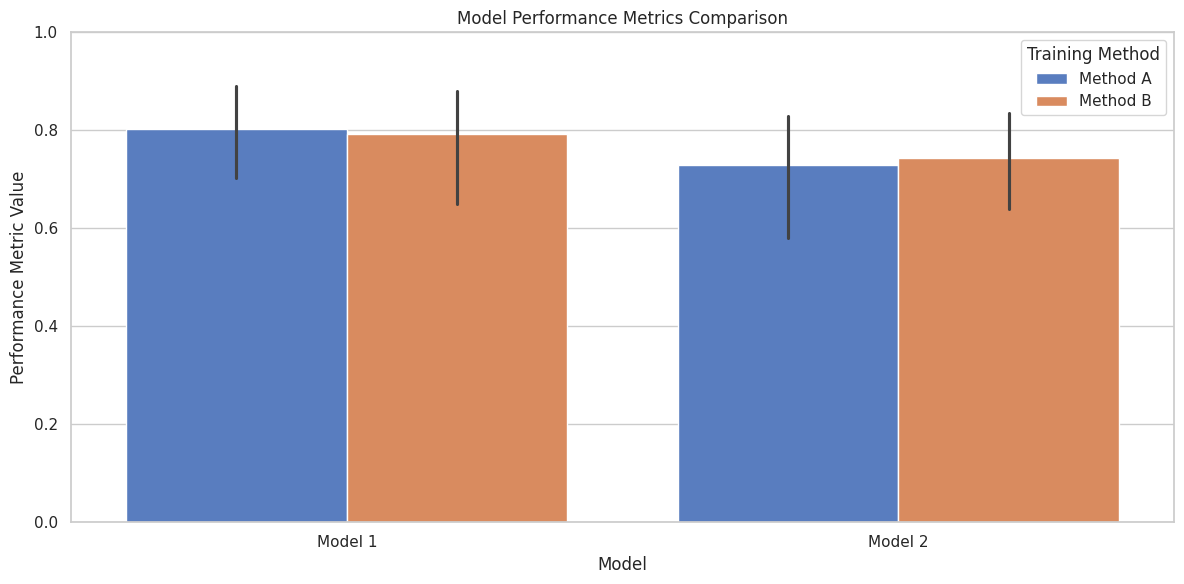

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
# data = {
#     'Model': ['Model 1', 'Model 1', 'Model 1', 'Model 2', 'Model 2', 'Model 2'],
#     'Training Method': ['Method A', 'Method B', 'Method A', 'Method B', 'Method A', 'Method B'],
#     'Metric 1': [0.8, 0.85, 0.9, 0.75, 0.78, 0.82],
#     'Metric 2': [0.6, 0.65, 0.7, 0.55, 0.58, 0.62],
#     'Metric 3': [0.9, 0.88, 0.92, 0.85, 0.83, 0.87],
# }
data = {
    'Model': ['NLinear', 'Multi-Patch', 'DLinear', 'Patch-TST', 'TimesMixer', 'iTransformer', 'Autoformer', 'Mamba', 'Informer', 'LSTM']*2,
    'MSE_Avg': [1.169, 1.117, 1.129, 1.162, 1.154, 1.178, 1.336, 1.38, 2.156, 2.202, 0.101, 0.101, 0.101, 0.097, 0.102, 0.102, 0.175, 0.111, 0.549, 0.441],
    'MAE_Avg': [0.596, 0.592, 0.644, 0.608, 0.602, 0.627, 0.726, 0.688, 1.102, 1.154, 0.112, 0.111, 0.12, 0.114, 0.111, 0.114, 0.184, 0.138, 0.446, 0.449],
    'RSE_Avg': [0.792, 0.781, 0.795, 0.82, 0.82, 0.854, 0.944, 0.943, 1.565, 1.996, 0.265, 0.256, 0.266, 0.262, 0.266, 0.266, 0.354, 0.285, 0.646, 0.573],
    'Method': ['one-for-one']*10 + ['one-for-all']*10
}


# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars=['Model', 'Training Method'], var_name='Metric', value_name='Value')

# Set the plot style
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Value', hue='Training Method', data=df_melted, palette='muted')

# Add labels and title
plt.title('Model Performance Metrics Comparison')
plt.ylabel('Performance Metric Value')
plt.xlabel('Model')
plt.legend(title='Training Method')
plt.ylim(0, 1)  # Adjust as needed
plt.tight_layout()

# Show plot
plt.show()
